# User Churn Prediction

In this project, we have a dataset of cell phone service customers. The data contain the information of customers' plans and usage of the service, as well as whether or not they stopped using the service eventually. The goal of this work is to use supervised learning models to predict and prevent user churn.

## Contents

<ul>
<li>[Part 1: Data Exploration](#Part-1:-Data-Exploration)
<li>[Part 2: Feature Preprocessing and Train/Test Split](#Part-2:-Feature-Preprocessing-and-Train/Test-Split)
<li>[Part 3: Model Training and Results Evaluation](#Part-3:-Model-Training-and-Result-Evaluation)
<li>[Part 4: Feature Importance](#Part-4:-Feature-Importance)
</ul>

# Part 1: Data Exploration

### Part 1.1: Import the Raw Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

df = pd.read_csv('churn.all')
df.shape

(5000, 21)

In [2]:
df.dtypes

state                             object
account_length                     int64
area_code                          int64
phone_number                      object
intl_plan                         object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churned                           object
dtype: object

In [3]:
df.head(10)

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


### Part 1.2: Data cleaning

Let's first check if there are NANs in the data frame.

In [4]:
df.isnull().sum() # there are no NANs

state                            0
account_length                   0
area_code                        0
phone_number                     0
intl_plan                        0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churned                          0
dtype: int64

``intl_plan``, ``voice_mail_plan``, and ``churned`` are categorical features with binary variables, so we can just transform them to 0 and 1.

In [5]:
# Note that there are white spaces in the strings
df.voice_mail_plan = df.voice_mail_plan.map({' no': 0, ' yes':1})
df.intl_plan = df.intl_plan.map({' no': 0, ' yes':1})
df.churned = df.churned.map({' False.': 0, ' True.':1})

In [6]:
df.head(10)

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,391-8027,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,355-9993,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,MO,147,415,329-9001,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,LA,117,408,335-4719,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,WV,141,415,330-8173,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


### Part 1.3:  Data Analysis and Visualization

#### Statistical Overview
Let's check the differences between the users who continue using the service and who do not.

In [7]:
df.churned.value_counts() / len(df)

0    0.8586
1    0.1414
Name: churned, dtype: float64

First, we should note that this is an unbalanced dataset. Only ~ 14% of the users stop using the sercice.

In [8]:
# Compare the mean values of features between the two classes 
df.groupby('churned').mean().drop(['area_code'], axis=1)

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
churned,,,,,,,,,,,,,,,,,
0,99.917074,0.063825,0.284416,8.291870,175.746564,99.899604,29.877494,198.805031,100.241556,16.898654,199.455113,99.975775,8.975593,10.190869,4.481947,2.752055,1.457722
1,102.332390,0.281471,0.144272,4.496464,207.870580,100.817539,35.338416,211.757850,99.884017,17.999562,206.078218,99.575672,9.273607,10.692362,4.151344,2.887426,2.254597


#### K-S Tests and Z Tests

We can use K-S tests to check whether the distributions of each feature of the two classes are drawn from the same distribution. For ``intl_plan`` and ``voice_mail_plan``, the values are either 0 or 1, so we can use [proportion Z tests](https://onlinecourses.science.psu.edu/stat414/node/268) to check whether the difference in mean values is statistically significant.

In [9]:
from scipy.stats import ks_2samp

def run_KS_test(feature):

    dist1 = df.loc[df.churned == 0, feature]
    dist2 = df.loc[df.churned == 1, feature]
    print feature+':'
    print ks_2samp(dist1,dist2),'\n'

run_KS_test('account_length')   
run_KS_test('number_vmail_messages')    
run_KS_test('total_day_minutes')
run_KS_test('total_day_calls')
run_KS_test('total_day_charge')
run_KS_test('total_eve_minutes')
run_KS_test('total_eve_calls')
run_KS_test('total_eve_charge')
run_KS_test('total_night_minutes')
run_KS_test('total_night_calls')
run_KS_test('total_night_charge')
run_KS_test('total_intl_minutes')
run_KS_test('total_intl_calls')
run_KS_test('total_intl_charge')
run_KS_test('number_customer_service_calls')

account_length:
Ks_2sampResult(statistic=0.04158936408765168, pvalue=0.2393621092523914) 

number_vmail_messages:
Ks_2sampResult(statistic=0.13991198460966192, pvalue=7.502131588373171e-11) 

total_day_minutes:
Ks_2sampResult(statistic=0.30453806087407176, pvalue=8.050945996407213e-50) 

total_day_calls:
Ks_2sampResult(statistic=0.0374314160975846, pvalue=0.3566846596189682) 

total_day_charge:
Ks_2sampResult(statistic=0.30453806087407176, pvalue=8.050945996407213e-50) 

total_eve_minutes:
Ks_2sampResult(statistic=0.11320491138661631, pvalue=2.9892973748115123e-07) 

total_eve_calls:
Ks_2sampResult(statistic=0.02443964072957161, pvalue=0.8573431622439269) 

total_eve_charge:
Ks_2sampResult(statistic=0.11320491138661631, pvalue=2.9892973748115123e-07) 

total_night_minutes:
Ks_2sampResult(statistic=0.06274383053759103, pvalue=0.016006448527058535) 

total_night_calls:
Ks_2sampResult(statistic=0.0302110175078604, pvalue=0.6303685394085426) 

total_night_charge:
Ks_2sampResult(statistic=0

We see that the p-values for ``account_length`` as well as the numbers of calls during daytime, evening, and nighttime are pretty high (> 23%), so we cannot reject the null hypothesis that the distributions of the two samples are the same. In contrast, the p-values of the other features are all very low, showing that the two samples are not drawn from the same distribution. The numbers of calls should not be relevant, and what matters should be the total minutes/charge of the calls. 

In [10]:
from statsmodels.stats.proportion import proportions_ztest

def run_proportion_Z_test(feature):

    dist1 = df.loc[df.churned == 0, feature]
    dist2 = df.loc[df.churned == 1, feature]
    n1 = len(dist1)
    p1 = dist1.sum()
    n2 = len(dist2)
    p2 = dist2.sum()
    z_score, p_value = proportions_ztest([p1, p2], [n1, n2])
    print feature+':'
    print 'z-score = {}; p-value = {}'.format(z_score, p_value),'\n'
    
run_proportion_Z_test('intl_plan')    
run_proportion_Z_test('voice_mail_plan')

intl_plan:
z-score = -18.3227379767; p-value = 5.45006509691e-75 

voice_mail_plan:
z-score = 7.8275487721; p-value = 4.97473681535e-15 



The Z tests reject the null hypothesis for the cases of these two features, so the difference between the two samples are significant.

#### Distribution Plots

For the continuous variables (besides ``intl_plan`` and ``voice_mail_plan``), we can also visualize the distributions of the two classes.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distributions for the numerical features
def DensityPlot(feature):
    fig = plt.figure(figsize=(8,4))
    sns.kdeplot(df.loc[df.churned == 0,feature], color='b',shade=True, label="stay")
    sns.kdeplot(df.loc[df.churned == 1,feature], color='r',shade=True, label="churn")
    plt.xlabel(feature)
    plt.ylabel('frequency')
    plt.show()

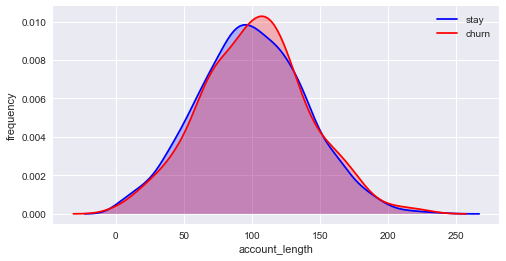

In [12]:
DensityPlot('account_length')

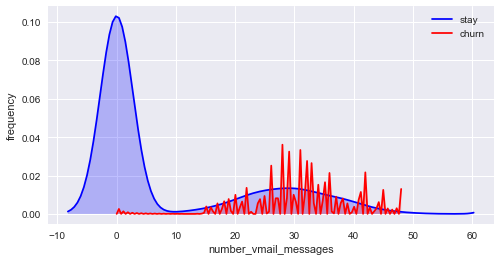

In [13]:
DensityPlot('number_vmail_messages')

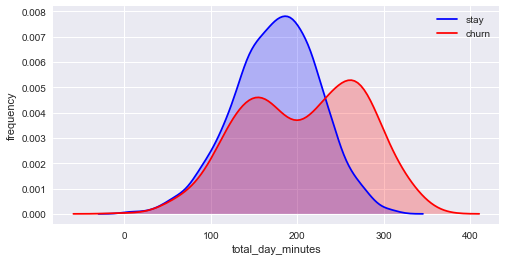

In [14]:
DensityPlot('total_day_minutes')

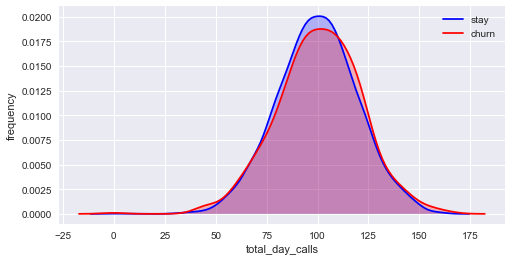

In [15]:
DensityPlot('total_day_calls')

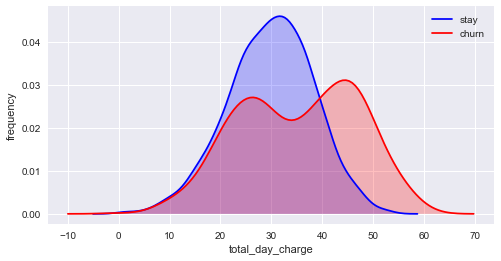

In [16]:
DensityPlot('total_day_charge')

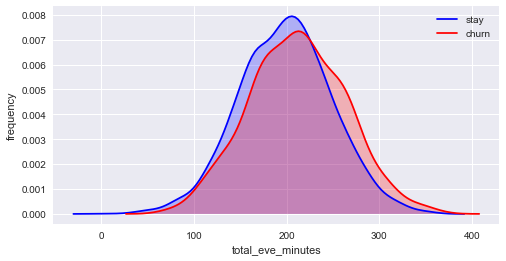

In [17]:
DensityPlot('total_eve_minutes')

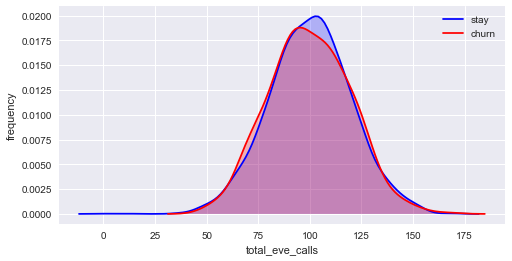

In [18]:
DensityPlot('total_eve_calls')

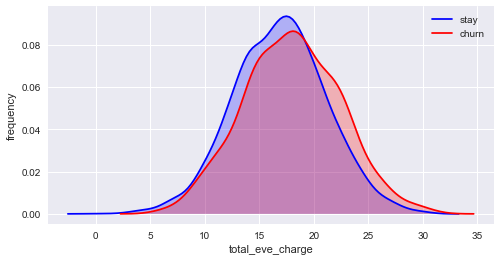

In [19]:
DensityPlot('total_eve_charge')

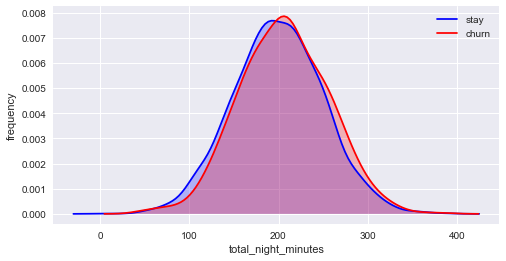

In [20]:
DensityPlot('total_night_minutes')

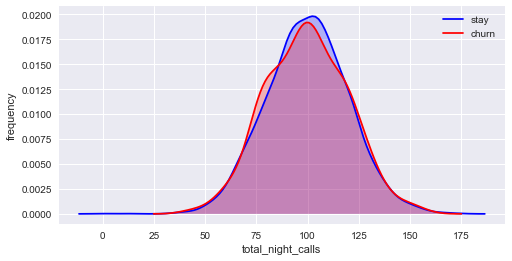

In [21]:
DensityPlot('total_night_calls')

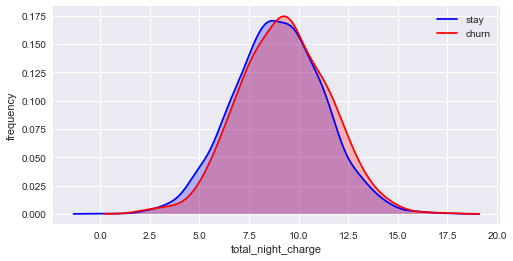

In [22]:
DensityPlot('total_night_charge')

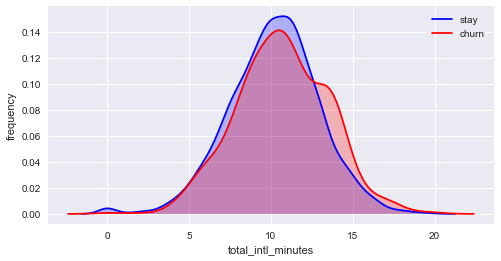

In [23]:
DensityPlot('total_intl_minutes')

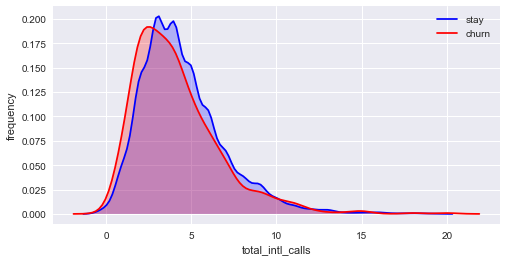

In [24]:
DensityPlot('total_intl_calls')

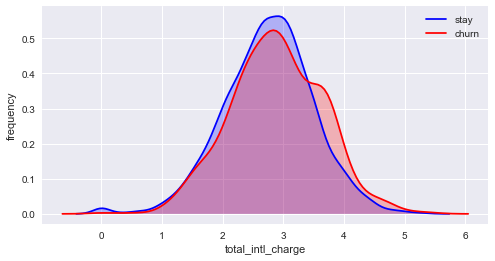

In [25]:
DensityPlot('total_intl_charge')

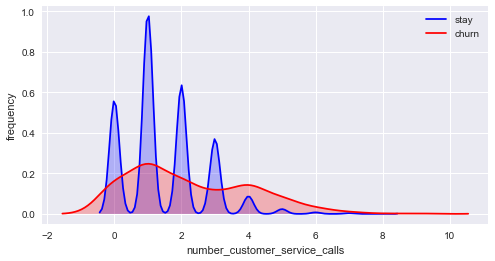

In [26]:
DensityPlot('number_customer_service_calls')

#### Correlation Matrix & Heatmap
Let's see the correlations between different numerical features.

In [27]:
corr = df.drop(['area_code'], axis=1).corr()
corr

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
account_length,1.000000,0.014681,-0.006650,-0.014575,-0.001017,0.028240,-0.001019,-0.009591,0.009143,-0.009587,0.000668,-0.007825,0.000656,0.001291,0.014277,0.001292,-0.001445,0.021203
intl_plan,0.014681,1.000000,0.009054,0.011947,0.028138,0.008102,0.028141,0.021235,0.002505,0.021234,-0.026508,0.005623,-0.026510,0.031799,0.004493,0.031751,-0.012974,0.259123
voice_mail_plan,-0.006650,0.009054,1.000000,0.954508,0.002059,-0.001735,0.002056,0.023328,-0.005916,0.023332,0.005524,0.009176,0.005522,0.004116,-0.007525,0.004165,-0.014453,-0.110698
number_vmail_messages,-0.014575,0.011947,0.954508,1.000000,0.005381,0.000883,0.005377,0.019490,-0.003954,0.019496,0.005541,0.002676,0.005535,0.002463,0.000124,0.002505,-0.007086,-0.097633
total_day_minutes,-0.001017,0.028138,0.002059,0.005381,1.000000,0.001935,1.000000,-0.010750,0.008128,-0.010760,0.011799,0.004236,0.011783,-0.019486,-0.001303,-0.019415,0.002733,0.207705
total_day_calls,0.028240,0.008102,-0.001735,0.000883,0.001935,1.000000,0.001936,-0.000699,0.003754,-0.000695,0.002804,-0.008308,0.002802,0.013097,0.010893,0.013161,-0.010739,0.016130
total_day_charge,-0.001019,0.028141,0.002056,0.005377,1.000000,0.001936,1.000000,-0.010747,0.008129,-0.010757,0.011801,0.004235,0.011785,-0.019490,-0.001307,-0.019419,0.002726,0.207700
total_eve_minutes,-0.009591,0.021235,0.023328,0.019490,-0.010750,-0.000699,-0.010747,1.000000,0.002763,1.000000,-0.016639,0.013420,-0.016642,0.000137,0.008388,0.000159,-0.013823,0.089288
total_eve_calls,0.009143,0.002505,-0.005916,-0.003954,0.008128,0.003754,0.008129,0.002763,1.000000,0.002778,0.001781,-0.013682,0.001799,-0.007458,0.005574,-0.007507,0.006235,-0.006284
total_eve_charge,-0.009587,0.021234,0.023332,0.019496,-0.010760,-0.000695,-0.010757,1.000000,0.002778,1.000000,-0.016649,0.013422,-0.016652,0.000132,0.008393,0.000155,-0.013836,0.089282


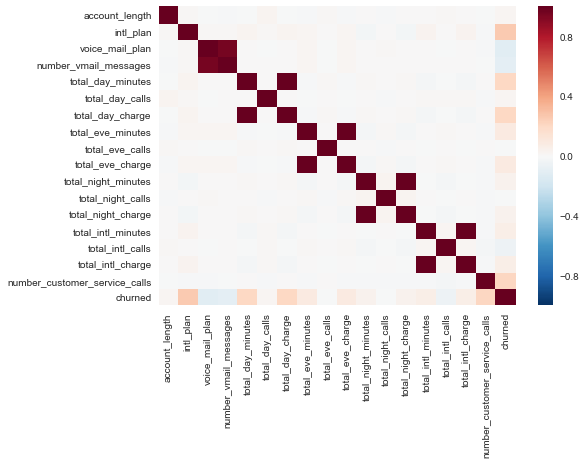

In [28]:
sns.heatmap(corr)
plt.show()

We can see that the minutes and charge of calls perfectly correlate with each other, which means they have repeated information. Keeping both the minutes and charge of calls would be redundant. We will therefore remove all the minutes. Also, ``voice_mail_plan`` and ``number_vmail_messages`` are highly correlated. We can remove ``voice_mail_plan``, since ``number_vmail_messages`` = 0 essentially means ``voice_mail_plan`` = 0. All the numbers of calls and ``account_length`` are irrelevant since they have little correlation with ``churned``.

# Part 2: Feature Preprocessing and Train/Test Split

In [29]:
# Get the labels
y = df['churned'].values

# Drop the useless columns: 1. irrelevant featues 2. featuers with repeated info 3. the target variable
to_drop = ['state','account_length','area_code','phone_number','voice_mail_plan',
           'total_day_calls','total_day_minutes','total_eve_calls','total_eve_minutes',
           'total_night_calls','total_night_minutes','total_intl_calls',
           'total_intl_minutes','churned']

X = df.drop(to_drop, axis=1)

# Train/Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=0)

In [30]:
X.head(10)

,intl_plan,number_vmail_messages,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,number_customer_service_calls
0,0,25,45.07,16.78,11.01,2.70,1
1,0,26,27.47,16.62,11.45,3.70,1
2,0,0,41.38,10.30,7.32,3.29,0
3,1,0,50.90,5.26,8.86,1.78,2
4,1,0,28.34,12.61,8.41,2.73,3
5,1,0,37.98,18.75,9.18,1.70,0
6,0,24,37.09,29.62,9.57,2.03,3
7,1,0,26.69,8.76,9.53,1.92,0
8,0,0,31.37,29.89,9.71,2.35,1
9,1,37,43.96,18.87,14.69,3.02,0


In [31]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler to the training set and tranform both the training and test sets
X_train = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test.values), columns=X.columns)

# Part 3: Model Training and Result Evaluation

Let's assume that we want to provide the customers who will likely to stop the service with a special offer, in order to prevent their drops. We want to target most of these customers, but we also don't want to falsely target too many people who actually won't stop using the service. Thus, we want to consider both precision and recall of the result when choosing the optimal hyperparameters of our models.

### Part 3.1: Train the Models with Grid Search

Here we use Area Under the Receiver Operating Characteristic Curve (ROC AUC) as the evaluation metric for grid search, in order to consider both true positive rates and false positive rates. We will try Logistic Regression, KNN, Random Forest, Support Vector Machine, and XGBoost Classifier.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score

####  Logistic Regression

In [33]:
lr = LogisticRegression()
C_grid = 0.001*10**(np.arange(0,1.01,0.01)*3)
parameters = {
    'penalty': ['l1', 'l2'], 
    'C': C_grid
}

Grid_LR = GridSearchCV(lr, parameters, scoring='roc_auc')
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([0.001  , 0.00107, ..., 0.93325, 1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [34]:
lr = Grid_LR.best_estimator_
print 'Best score: ', Grid_LR.best_score_
print 'Best parameters set: \n', Grid_LR.best_params_

Best score:  0.8281228796364782
Best parameters set: 
{'penalty': 'l2', 'C': 0.001}


In [35]:
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]

#### KNN

In [36]:
knn = KNeighborsClassifier()
parameters = {
    'n_neighbors':[4,8,16],
    'weights': ['uniform','distance']
}

Grid_KNN = GridSearchCV(knn, parameters, scoring='roc_auc')
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [4, 8, 16], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [37]:
knn = Grid_KNN.best_estimator_
print 'Best score: ', Grid_KNN.best_score_
print 'Best parameters set: \n', Grid_KNN.best_params_

Best score:  0.9003129964579348
Best parameters set: 
{'n_neighbors': 16, 'weights': 'distance'}


In [38]:
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:,1]

#### Random Forest Classifier

In [39]:
rf = RandomForestClassifier(n_estimators=20, criterion="entropy", random_state=0)
parameters = {
    "max_features": range(2,7),
    "min_samples_split": range(4,10),
    "min_samples_leaf": range(1,6),
}

Grid_RF = GridSearchCV(rf, parameters, scoring='roc_auc', n_jobs=-1)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': [2, 3, 4, 5, 6], 'min_samples_split': [4, 5, 6, 7, 8, 9], 'min_samples_leaf': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [40]:
rf = Grid_RF.best_estimator_
print 'Best score: ', Grid_RF.best_score_
print 'Best parameters set: \n', Grid_RF.best_params_

Best score:  0.9128126753010477
Best parameters set: 
{'max_features': 6, 'min_samples_split': 7, 'min_samples_leaf': 3}


In [41]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

#### SVM

In [42]:
svm = SVC(probability=True)
C_grid = 10**(np.arange(0,1.01,0.01)*2)
parameters = {'C': C_grid}

Grid_SVM = GridSearchCV(svm, parameters, scoring='roc_auc', n_jobs=-1)
Grid_SVM.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.     ,   1.04713, ...,  95.49926, 100.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [43]:
svm = Grid_SVM.best_estimator_
print 'Best score: ', Grid_SVM.best_score_
print 'Best parameters set: \n', Grid_SVM.best_params_

Best score:  0.9005154695158768
Best parameters set: 
{'C': 2.6302679918953817}


In [44]:
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:,1]

#### XGBoost

In [45]:
xgb = XGBClassifier(random_state=0)
parameters = {
    'learning_rate': [0.025,0.05,0.1], 
    'max_depth': [3,4,5],
    'subsample': [0.25,0.5,1.0],
    'reg_lambda': [1,2,3], 
    'reg_alpha': [0,1,2]
}

warnings.filterwarnings('ignore', category=DeprecationWarning) 
Grid_XGB = GridSearchCV(xgb, parameters, scoring='roc_auc', n_jobs=-1)
Grid_XGB.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'subsample': [0.25, 0.5, 1.0], 'learning_rate': [0.025, 0.05, 0.1], 'reg_lambda': [1, 2, 3], 'reg_alpha': [0, 1, 2], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [46]:
xgb = Grid_XGB.best_estimator_
print 'Best score: ', Grid_XGB.best_score_
print 'Best parameters set: \n', Grid_XGB.best_params_

Best score:  0.9115561648140047
Best parameters set: 
{'reg_lambda': 2, 'learning_rate': 0.1, 'reg_alpha': 2, 'max_depth': 5, 'subsample': 1.0}


In [47]:
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

### Part 3.2: Evaluation

In [48]:
def cal_evaluation(classifier, cm, auc):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    f1 = 2 * precision * recall / (precision + recall)
    print classifier
    print "Accuracy is " + str(accuracy)
    print "Precision is " + str(precision)
    print "Recall is " + str(recall)
    print "F1 score is " + str(f1)
    print "ROC AUC is " + str(auc)

def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for x in confusion_matrices:
        classifier, cm, auc = x[0], x[1], x[2]
        cal_evaluation(classifier, cm, auc)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for {}'.format(classifier))
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Logisitic Regression
Accuracy is 0.8686666666666667
Precision is 0.5757575757575758
Recall is 0.09405940594059406
F1 score is 0.16170212765957448
ROC AUC is 0.8270225327617508


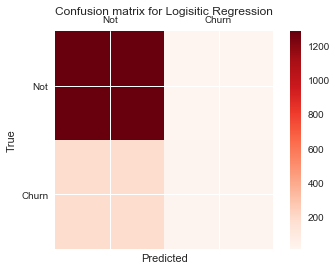

K-Nearest-Neighbors
Accuracy is 0.9173333333333333
Precision is 0.90625
Recall is 0.4306930693069307
F1 score is 0.5838926174496644
ROC AUC is 0.9084501670506034


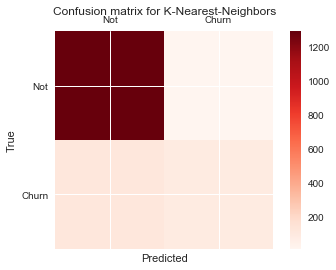

Random Forest
Accuracy is 0.9453333333333334
Precision is 0.910958904109589
Recall is 0.6584158415841584
F1 score is 0.764367816091954
ROC AUC is 0.9019321423667791


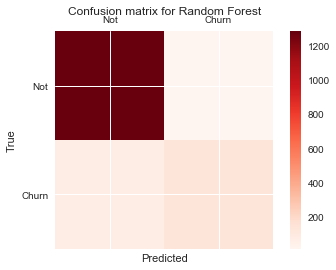

Support Vector Machine
Accuracy is 0.946
Precision is 0.9290780141843972
Recall is 0.6485148514851485
F1 score is 0.7638483965014577
ROC AUC is 0.9056221300096111


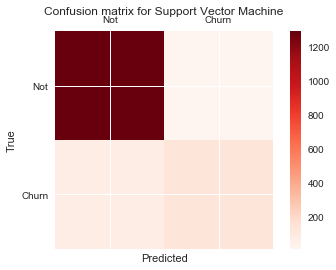

XGBoost Classifier
Accuracy is 0.9486666666666667
Precision is 0.9310344827586207
Recall is 0.6683168316831684
F1 score is 0.7780979827089337
ROC AUC is 0.9143503333384185


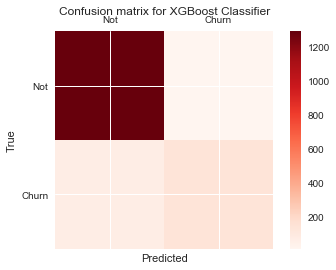

In [49]:
%matplotlib inline

confusion_matrices = [
    ("Logisitic Regression", confusion_matrix(y_test, y_pred_lr), roc_auc_score(y_test, y_prob_lr)),
    ("K-Nearest-Neighbors", confusion_matrix(y_test, y_pred_knn), roc_auc_score(y_test, y_prob_knn)),
    ("Random Forest", confusion_matrix(y_test, y_pred_rf), roc_auc_score(y_test, y_prob_rf)),
    ("Support Vector Machine", confusion_matrix(y_test, y_pred_svm), roc_auc_score(y_test, y_prob_svm)),
    ("XGBoost Classifier", confusion_matrix(y_test, y_pred_xgb), roc_auc_score(y_test, y_prob_xgb))
]

draw_confusion_matrices(confusion_matrices)

Random Forest, SVM, and XGBoost perform better than the other two models. Let's just average their predictions.

Stacked Model
Accuracy is 0.952
Precision is 0.9333333333333333
Recall is 0.693069306930693
F1 score is 0.7954545454545454
ROC AUC is 0.9166081862423531


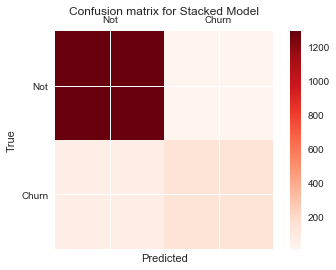

In [50]:
# average the predicted probabilities to make predictions
y_prob = y_prob_rf/3.0 + y_prob_svm/3.0 + y_prob_xgb/3.0
y_avg = y_prob >= 0.5

confusion_matrices = [
    ("Stacked Model", confusion_matrix(y_test, y_avg), roc_auc_score(y_test, y_prob))
]

draw_confusion_matrices(confusion_matrices)

### Part 3.3: Fine-tune the Threshold
In the following, we will try to determine the optimal threshold for our stacked model.

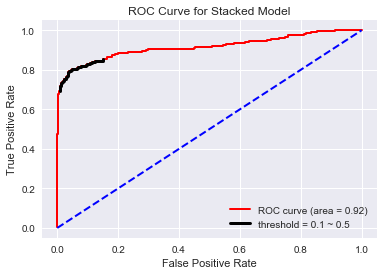

In [51]:
# use the predicted probability to make the ROC curve
fpr, tpr, thresh = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = roc_auc_score(y_test, y_prob)

# These are the points at threshold = 0.1~0.5
x1 = fpr[(thresh <= 0.5) & (thresh >= 0.1)] 
x2 = tpr[(thresh <= 0.5) & (thresh >= 0.1)]

fig = plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--')
plt.plot(x1, x2, color='k', lw=3, label='threshold = 0.1 ~ 0.5')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacked Model')
plt.legend(loc="lower right")
plt.show()

Note that true positive rate and recall are actually equal, so we can use a lower threshold (< 0.5) to acheive higher recall. Let's first see how different evaluation metrics change with the threshold we choose.

In [52]:
acc_grid = np.zeros(thresh.shape)
prec_grid = np.zeros(thresh.shape)
recall_grid = np.zeros(thresh.shape)
TP_grid = np.zeros(thresh.shape)
FP_grid = np.zeros(thresh.shape)
FN_grid = np.zeros(thresh.shape)

for i in range(thresh.shape[0]):
    cm = confusion_matrix(y_test, y_prob >= thresh[i])
    acc_grid[i] = accuracy_score(y_test, y_prob >= thresh[i])
    prec_grid[i] = precision_score(y_test, y_prob >= thresh[i])
    recall_grid[i] = recall_score(y_test, y_prob >= thresh[i])
    TP_grid[i] = cm[1][1]
    FP_grid[i] = cm[0][1]
    FN_grid[i] = cm[1][0]

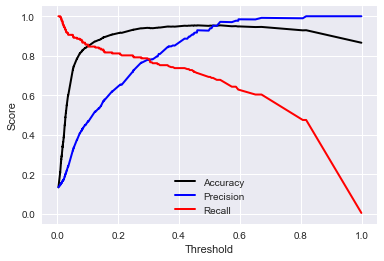

In [53]:
fig = plt.figure()
plt.plot(thresh, acc_grid, color='k', lw=2, label='Accuracy')
plt.plot(thresh, prec_grid, color='b', lw=2, label='Precision')
plt.plot(thresh, recall_grid, color='r', lw=2, label='Recall')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend(loc="lower center")
plt.show()

Because there is a trade-off between precision and recall, we need to set a goal and fine-tune the threshold of our model. In this problem, our goal is to minimize the loss of our profitability. As mentioned earlier, we want to provide the customers who will likely to stop the service with a special offer, in order to prevent their drops. However, we would make additional cost if we falsely target a customer who actually won't stop using the service. 

In the following, we use a very simple method to estimate the loss of our profitability:
- If a customer stop the service, we lose 1 point
- If a customer takes the special offer we provide and continue using the service, we lose 0.1 point
- If we do nothing and a customer continue using the service, we lose nothing and get 0 point
- We assume that half of the customers who were going to drop will take the offer, and all the the customers who were not going to drop will take the offer.


Note that these are just my assumptions for a case study. In the reality, the company would have to carefully estimate these numbers.
<br>
<br>
We can inspect how the loss changes with the threshold we use as follows.

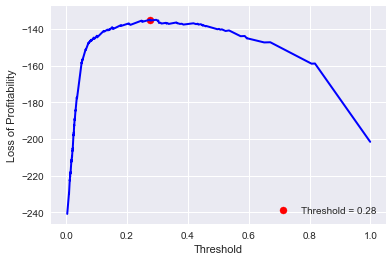

In [54]:
P = 0.5 # The chance a customer who was going to drop would take the special offer
loss = TP_grid*P*(-0.1) + TP_grid*(1-P)*(-1) + FN_grid*(-1) + FP_grid*(-0.1)
thresh_best = thresh[loss == max(loss)][0]
    
fig = plt.figure()
plt.plot(thresh, loss, color='b', lw=2)
plt.scatter([thresh_best], [max(loss)], color='r', s=50, label='Threshold = {:.2f}'.format(thresh_best))
plt.xlim([-0.05, 1.05])
plt.xlabel('Threshold')
plt.ylabel('Loss of Profitability')
plt.legend(loc="lower right")
plt.show()

We see that the loss is minimized at threshold = 0.28. Now let's take a look at the confusion matrix using this threshold.

Stacked Model
Accuracy is 0.9386666666666666
Precision is 0.7644230769230769
Recall is 0.7871287128712872
F1 score is 0.775609756097561
ROC AUC is 0.9166081862423531


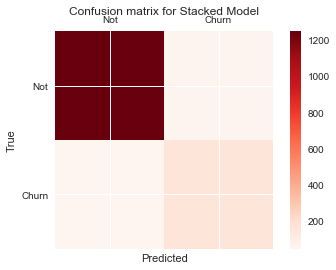

In [55]:
y_pred_new = y_prob > thresh_best

confusion_matrices = [
    ("Stacked Model", confusion_matrix(y_test, y_pred_new), roc_auc_score(y_test, y_prob))
]

draw_confusion_matrices(confusion_matrices)

# Part 4: Feature Importance
Lastly, let's check the relative importance of individual features based on the Random Forest and the XGBoost.

In [56]:
importances = rf.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X.columns), reverse=True):
    print v + ": " + str(k)

Feature importance ranking by Random Forest Model:
total_day_charge: 0.3208
total_eve_charge: 0.1841
number_customer_service_calls: 0.129
total_night_charge: 0.1112
total_intl_charge: 0.101
intl_plan: 0.0899
number_vmail_messages: 0.064


In [57]:
importances = xgb.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X.columns), reverse=True):
    print v + ": " + str(k)

Feature importance ranking by Random Forest Model:
total_day_charge: 0.2506
total_eve_charge: 0.2136
total_night_charge: 0.1996
total_intl_charge: 0.1326
number_customer_service_calls: 0.0775
number_vmail_messages: 0.072
intl_plan: 0.054


Overall, the more important features are the charge of the calls, which is as expected. This is because the customers who spent more money are more likely to drop and switch to other cell phone service providers. For the Random Forest, the number of customer service calls is also quite important and is ranked at the third. This makes sense since the users who called the customer service more tend to have more problems and are likely to drop as well.